###Unidade 7  - Recuperação da Informação
Aluno(a): Tainá da Silva Lima
<br>
DRE: 116165607
<br><br>
Aluno(a): Rafael Pais Cardoso
<br>
DRE: 116140788
<br><br>
Professor(a): Giseli Lopes
<br>
Período: 2020.4 PLE

# Importando as bibliotecas necessárias aos exercícios realizados nesse trabalho

In [ ]:
import numpy as np
import math
from prettytable import PrettyTable
import matplotlib.pyplot as plt

# Funções

##Pré-processamento da coleção

In [ ]:
# M             --> Vetor coluna onde cada linha representa o texto de um documento (matriz Nx1).
# separadores   --> Vetor linha de caracteres (matriz 1xNc), onde o elemento em cada coluna representa um separador a ser usado na tokenização dos documentos.
# stopwords     --> Vetor linha de strings (matriz 1xNs), onde o elemento em cada coluna armazena uma stopword.
# Essa função aplica as etapas de pré-processamento nos documentos.
def normalizacaoTokenizacao(M, separadores, stopwords):

  matriz = []

  for index in range(0, len(M)):

    # Recebe o texto de um novo documento a cada iteração.
    documentoTemporario = M[index][0]

    # Remoção dos delimitadores e normalização.
    for delimitador in separadores:
      documentoTemporario = documentoTemporario.lower().replace(delimitador, " ")

    # Obtenção dos possíveis tokens
    tokens = documentoTemporario.split()

    # Remoção das stopwords e armazenamento dos tokens em uma matriz Nx1 (cada linha representa um documento e a coluna apresenta a lista de tokens extraídos do documento).
    matriz.append(list(filter(lambda a: a not in stopwords, tokens)))
    
  return matriz

## Pré-processamento da consulta

In [ ]:
# consulta      --> String contendo os termos da consulta.
# separadores   --> Vetor linha de caracteres (matriz 1xNc), onde o elemento em cada coluna representa um separador a ser usado na tokenização dos documentos.
# stopwords     --> Vetor linha de strings (matriz 1xNs), onde o elemento em cada coluna armazena uma stopword.
# Essa função aplica as etapas de pré-processamento na consulta.
def tratamentoConsulta(consulta, separadores, stopwords):

  consultaTratada = consulta
  for delimitador in separadores:
      consultaTratada = consultaTratada.lower().replace(delimitador, " ")
  
  consultaTratada = consultaTratada.split()
  
  consultaTratada = list(filter(lambda a: a not in stopwords, consultaTratada))
  
  return consultaTratada

##Determinação da frequência do termo no documento

In [ ]:
# termo     --> String contendo um único elemento.
# documento --> Vetor de string (matriz 1x1), que representa o texto de um único documento da coleção.
# Calcula a frequência de um determinado termo em um documento específico.
def freqDoc(termo, documento):
  return documento.count(termo)

##Determinação da frequência do termo na coleção

In [ ]:
# termo   --> String contendo um único elemento.
# colecao --> Vetor de string (matriz 1x1), que representa o texto de um único documento da coleção.
# Calcula a frequência de um determinado termo em um documento específico.
def freqCol(termo, colecao):
  contaTermo = 0
  for documento in colecao:
    if(termo in documento):
      contaTermo+= 1
  return contaTermo

## Cálculo TF-IDF

Aplicamos a fórmula abaixo para calcular o peso para os termos dos documentos e para a consulta 

$\left ( 1+\log f_{i,j}\right ) * \left ( \log\frac{N}{^{N_{i}}} \right )$

In [ ]:
# colecao --> Vetor coluna onde cada linha representa o texto de um documento que foi pré-processado, ou seja, foi aplicado normalização e tokenização.
# Esta função realiza a ponderação TF-IDF nos termos dos documentos e retorna um dicionário de dicionário em que a chave do dicionário mais externo se 
# refere ao documento e o valor associado à chave é um outro dicionário em que a chave é o termo e o valor associado é o seu peso.
def ponderacaoTF_IDF(colecao):

  termoLista      = []
  dicionarioPeso  = {}

  # Insere os termos dos documentos na lista "termoLista", mas sem repetição
  for documentos in colecao:
    for termo in documentos:
      if(termo not in termoLista):
        termoLista.append(termo)

  numeroDocumento = 0

  # Aplicação da fórmula do "Esquema de ponderação 3" do slide da aula
  for documento in colecao:
    dicionarioTemp = {}
    for termo in termoLista:
      peso = 0
      if(termo in documento):
        peso = (1 + math.log2(freqDoc(termo, documento))) * (math.log2(len(colecao)/freqCol(termo, colecao)))
      if(termo not in dicionarioTemp.keys()):
        dicionarioTemp[termo] = peso

    dicionarioPeso[numeroDocumento] = dicionarioTemp
    numeroDocumento+= 1

  return dicionarioPeso

In [ ]:
# colecao         --> Vetor coluna onde cada linha representa o texto de um documento que foi pré-processado, ou seja, foi aplicado normalização e tokenização.
# consultaTratada --> Lista com os termos da consulta pré-processados
# Realiza a ponderação TF-IDF nos termos da consulta e retorna um dicionário em que as chaves são os termos e os valores são os respectivos pesos.
def ponderacaoTF_IDF2(colecao, consultaTratada):

  termoLista = []

  # Insere os termos dos documentos na lista "termoLista", mas sem repetição
  for documentos in colecao:
    for termo in documentos:
      if(termo not in termoLista):
        termoLista.append(termo)

  numeroDocumento = 0

  dicionarioTemp  = {}

  # Aplicação da fórmula do "Esquema de ponderação 3" do slide da aula
  for termo in termoLista:
    peso = 0
    if(termo in consultaTratada):
      peso = (1 + math.log2( freqDoc(termo, consultaTratada) ) ) * (math.log2( len(colecao) / freqCol(termo, colecao) ) )
    if(termo not in dicionarioTemp.keys()):
      dicionarioTemp[termo] = peso

  return dicionarioTemp


# vetorConsulta --> consulta representada como vetores de termos com pesos associados
# vetorDoc      --> documento representado como vetores de termos com pesos associados
# Cálculo do cosseno do ângulo formado com o vetor da consulta e o vetor do documento
def sim(vetorDoc, vetorConsulta):
  somatorio = 0

  for i,j in zip(vetorDoc.keys(),range(len(vetorDoc))):
    somatorio += vetorDoc[i] * vetorConsulta[j]

  moduloVetorDoc      = np.linalg.norm(np.array(list(vetorDoc.values())))
  moduloVetorConsulta = np.linalg.norm(np.array(vetorConsulta))

  return somatorio/(moduloVetorDoc*moduloVetorConsulta)


# dicPesosDoc      --> dicionário obtido da ponderação TF-IDF aplicada nos documentos
# dicPesosConsulta --> dicionário obtido da ponderação TF-IDF aplicada na consulta
# Aplica o ranqueamento dos documentos
def rank(dicPesosDoc, dicPesosConsulta):
  
  dicRank = {}

  for key in dicPesosDoc.keys():
    rankDict = sim(dicPesosDoc[key], list(dicPesosConsulta.values()))
    dicRank[key] = rankDict
  
  return dicRank

## Cálculo da similaridade pelo BM25

Aplicamos a fórmula abaixo para calcular a similaridade entre um documento j e uma consulta q:

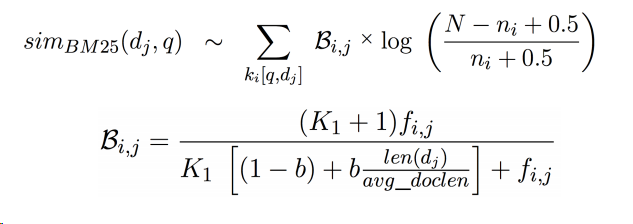

In [ ]:
# matriz --> matriz de tokens Nx1 (cada linha representa um documento e a coluna apresenta a lista de tokens extraídos do documento).
# Essa função cria a matriz de incidências. Essa matriz indica se um determinado token existe em um documento (valor > 0 caso exista. Do contrário, valor = 0), assim como
# a frequência neste documento.
def criarMatrizIncidenciasV2(matriz):

  # A chave do diconário é o token. O valor associado à chave é uma matriz 1x1, em que o elemento dicionarioTokens[token][0][0] representa uma matriz 1xN, sendo que cada coluna está 
  # associada a um respectivo documento e os possíveis valores que podem assumir são maiores ou iguais a 0 (o valor 0 significada que o token não se encontra no documento e o valores
  # maiores do que 0 significam a frequência com aparecem no documento.
  dicionarioTokensV2 = {}

  # Itera sobre os documentos
  for index in range(0, len(matriz)):
    
    # Itera em cada elemento da lista de token
    for token in matriz[index]:

      # Adiciona o token ao dicionário, caso ele não exista. Além disso, seta o valor para 1 para o documento ao qual pertence.
      if(token not in dicionarioTokensV2.keys()):
        x                         = [0]*len(matriz)
        x[index]                  = 1
        dicionarioTokensV2[token] = [x]

      # Incrementa-se a frequência com que aparece no respectivo documento
      else:
          dicionarioTokensV2[token][0][index] += 1
          
  return dicionarioTokensV2

#Função que calcula o tamanho do documento
def sizeDocument (document):
  return len(document)

#Função que calcula o tamanho médio dos documentos da coleção
def averageSizeDocument(colecao):
  avg = 0
  for document in colecao:
    avg += sizeDocument(document)
  
  avg = avg / len(colecao)

  return avg

#Função que calcula o Ni de cada termo
def Ni(frequenciasDoc, termo):
  ni = 0

  for freq in frequenciasDoc[termo][0]:
    if (freq > 0):
      ni+=1

  return ni

#Função que calcula o B para cada termo i e documento j
def B(termo, documento, colecao, frequenciasDoc, K1 = 1, b = 0.85):
  return ( (K1 + 1)*frequenciasDoc[termo][0][documento] ) / ( K1 * ( (1-b) + b*( sizeDocument(colecao[documento])/averageSizeDocument(colecao) ) )  +  frequenciasDoc[termo][0][documento]) 

#Função que calcula a parte do log na conta de similaridade
def logsPart(N, ni):
  return math.log2( (N-ni + 0.5) / (ni + 0.5)  )

#Função que encontra os termos em comum entre a consulta e o documento em questão
def findIntersectionBetween(consulta, documento):
    return list(set(consulta) & set(documento))

#Função que calcula os valores da fórmula de similaridade (valores para o ranking)
def similaridadeBM25(consulta, colecao, N):

  simConsultaDoc = {}

  frequenciasDoc = criarMatrizIncidenciasV2(colecao)

  for i in range(len(colecao)):
    termosEmComum = findIntersectionBetween(consulta, colecao[i])

    sum = 0

    for termo in termosEmComum:
      sum += B(termo, i, colecao, frequenciasDoc) * logsPart(N, Ni(frequenciasDoc, termo))
    
    if i not in simConsultaDoc.keys():
      simConsultaDoc[i] = sum
  
  return simConsultaDoc




## Cálculo do Revocação e Precisão 
$Recall = \frac{\left | R \bigcap A \right |}{\left | R \right |}$ <br><br>
$Precision =\frac{\left | R \bigcap A \right |}{\left | A \right |}$

In [ ]:
def findIntersectionBetween(consulta, documento):
    return list(set(consulta) & set(documento))

def revocacao(Rcurr, R, A):
  intersec = findIntersectionBetween(Rcurr,A)
  return len(intersec)/len(R)

def precisao(R, A):
  intersec = findIntersectionBetween(R, A)
  return len(intersec)/len(A)

def getRevocacaoRanking(A, R):
  recalls = []
  acc = []
  for doc in R:
    if(doc in A):
      acc.append(doc)
      recalls.append(revocacao(acc, R, A))
  
  return recalls

def getPrecisaoRanking(A, R):
  precisions = []
  acc = []
  for doc in A:
    if(doc in R):
      acc = A[:A.index(doc)+1]
      precisions.append(precisao(R, acc))

  return precisions

## Cálculo da Precisão interpolada para cada um dos 11 níveis padrão de revocação

In [ ]:
refRecall = [ j/10 for j in range(11)]

#print(refRecall)

def precisaoInterpolada(refRecall, recallPrecision):
  precisaoInterpol = []
  for ref in refRecall:
    #aux = []
    aux = [ref, 0]
    for j in range(len(recallPrecision[0])):
      if(ref <= recallPrecision[0][j]):
        if (aux[1] < recallPrecision[1][j]):
          aux[1] = recallPrecision[1][j]
    precisaoInterpol.append(aux)

  return precisaoInterpol


## Cálculo da Precisão média para a consulta (MAPi)

In [ ]:
def getPrecisaoRanking2(A, R):
  precisions = []
  acc = []
  for doc in A:
    if(doc in R):
      acc = A[:A.index(doc)+1]
      precisions.append([doc, precisao(R, acc)])

  return precisions

def getRankValue(doc, rank):
  for element in rank:
    if (element[0] == doc):
      return element[1]

def MAPi (rank, Ri):
  sum = 0
  precisions = getPrecisaoRanking2([element[0] for element in rank],Ri)

  sum = 0 
  for element in precisions:
    if(getRankValue(element[0], rank) > 0):
      sum += element[1]
  
  return (1/len(Ri)) * sum


# Exemplo 1


Coleção, stopwords, consulta e separadores

In [ ]:
# Conjunto de documentos
M1            = [["O peã e o caval são pec de xadrez. O caval é o melhor do jog."],
                ["A jog envolv a torr, o peã e o rei."],
                ["O peã lac o boi"],
                ["Caval de rodei!"],
                ["Polic o jog no xadrez."]]

# Lista de stopwords
stopwords1    = ["a", "o", "e", "é", "de", "do", "no", "são"]

# String contendo os termos da consulta
q1            = "xadrez peã caval torr"

# Separadores para a tokenizacao
separadores1  = [" ",",",".","!","?"] 

R1 = [1,2]

Aplicação do pré-processamento na coleção e na consulta, aplicação do BM25 e o modelo vetorial na coleção, cálculo da revocação e precisão, precisão interpolada e precisão MAP

Resultado da normalização e tokenização:
[['peã', 'caval', 'pec', 'xadrez', 'caval', 'melhor', 'jog'], ['jog', 'envolv', 'torr', 'peã', 'rei'], ['peã', 'lac', 'boi'], ['caval', 'rodei'], ['polic', 'jog', 'xadrez']]


Resultado do tratamento da consulta:
['xadrez', 'peã', 'caval', 'torr']


Resultado da ponderação TF-IDF para os termos da coleção:
{0: {'peã': 0.7369655941662062, 'caval': 2.643856189774725, 'pec': 2.321928094887362, 'xadrez': 1.3219280948873624, 'melhor': 2.321928094887362, 'jog': 0.7369655941662062, 'envolv': 0, 'torr': 0, 'rei': 0, 'lac': 0, 'boi': 0, 'rodei': 0, 'polic': 0}, 1: {'peã': 0.7369655941662062, 'caval': 0, 'pec': 0, 'xadrez': 0, 'melhor': 0, 'jog': 0.7369655941662062, 'envolv': 2.321928094887362, 'torr': 2.321928094887362, 'rei': 2.321928094887362, 'lac': 0, 'boi': 0, 'rodei': 0, 'polic': 0}, 2: {'peã': 0.7369655941662062, 'caval': 0, 'pec': 0, 'xadrez': 0, 'melhor': 0, 'jog': 0, 'envolv': 0, 'torr': 0, 'rei': 0, 'lac': 2.321928094887362, 'boi': 2.321928094

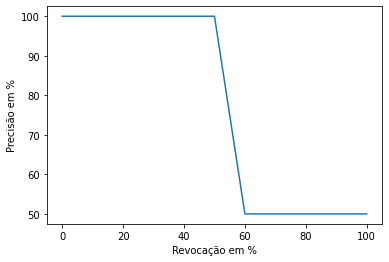

Modelo Vetorial
+----------------------------------+---------------------------------+
| Revocação - Precisão Interpolada | Precisão - Precisão Interpolada |
+----------------------------------+---------------------------------+
|               0.0                |               1.0               |
|               0.1                |               1.0               |
|               0.2                |               1.0               |
|               0.3                |               1.0               |
|               0.4                |               1.0               |
|               0.5                |               1.0               |
|               0.6                |               1.0               |
|               0.7                |               1.0               |
|               0.8                |               1.0               |
|               0.9                |               1.0               |
|               1.0                |               1.0       

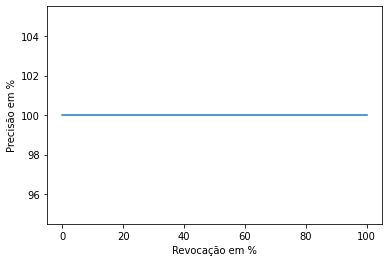

Precisão média para consulta - MAPi
+-------------+------------------------+
| MAPi - BM25 | MAPi - Modelo Vetorial |
+-------------+------------------------+
|     0.75    |          1.0           |
+-------------+------------------------+


In [ ]:
resultadoEx1            = normalizacaoTokenizacao(M1, separadores1, stopwords1)
print("Resultado da normalização e tokenização:")
print(resultadoEx1)
print("\n")

consultaTratadaEx1      = tratamentoConsulta(q1, separadores1, stopwords1)
print("Resultado do tratamento da consulta:")
print(consultaTratadaEx1)
print('\n')

dicRank1 = similaridadeBM25(consultaTratadaEx1, resultadoEx1, len(resultadoEx1))

listRank1 = sorted(dicRank1.items(), key=lambda x: x[1], reverse=True)

ponderacaoDocumentosEx1 = ponderacaoTF_IDF(resultadoEx1)
print("Resultado da ponderação TF-IDF para os termos da coleção:")
print(ponderacaoDocumentosEx1)
print('\n')

var1                    = ponderacaoTF_IDF2(resultadoEx1, consultaTratadaEx1)
dicRank12                = rank(ponderacaoTF_IDF(resultadoEx1), var1)
listRank12               = sorted(dicRank12.items(), key=lambda x: x[1], reverse=True)

print("RANKING:")
print("\n\n")

tableRank1              = PrettyTable()

column_names1           = ["Posição", "No do Documento", "Documento", "Rank BM25"] 
#print(listRank1)

tableRank1.add_column(column_names1[0], [i+1 for i in range(len(listRank1))])
tableRank1.add_column(column_names1[1], [doc[0] for doc in listRank1])
tableRank1.add_column(column_names1[2], [M1[document[0]][0] for document in listRank1])
tableRank1.add_column(column_names1[3], [str(document[1]) for document in listRank1])


tableRank12              = PrettyTable()

column_names12           = ["Posição", "No do Documento", "Documento", "Rank Modelo Vetorial (TF-IDF)"] 

tableRank12.add_column(column_names12[0], [i+1 for i in range(len(listRank12))])
tableRank12.add_column(column_names12[1], [doc[0] for doc in listRank12])
tableRank12.add_column(column_names12[2], [M1[document[0]][0] for document in listRank12])
tableRank12.add_column(column_names12[3], [str(document[1]) for document in listRank12])

print("BM25")
print(tableRank1)
print("Modelo Vetorial")
print(tableRank12)



# Parte do exercício 9 

print("AVALIAÇÃO DA RECUPERAÇÃO:")
print("\n\n")
print("Revocação e Precisão")

revoc1 = getRevocacaoRanking([doc[0] for doc in listRank1], [i-1 for i in R1])
revoc12 = getRevocacaoRanking([doc2[0] for doc2 in listRank12], [i-1 for i in R1])

preci1 = getPrecisaoRanking([doc[0] for doc in listRank1], [i-1 for i in R1])
preci12 = getPrecisaoRanking([doc2[0] for doc2 in listRank12], [i-1 for i in R1])

tableRank13              = PrettyTable()

column_names13           = ["Revocação - BM25", "Precisão - BM25"] 

tableRank13.add_column(column_names13[0], revoc1)
tableRank13.add_column(column_names13[1], preci1)

tableRank14              = PrettyTable()

column_names14           = ["Revocação - Modelo Vetorial", "Precisão - Modelo Vetorial"] 

tableRank14.add_column(column_names14[0], revoc12)
tableRank14.add_column(column_names14[1], preci12)

print(tableRank13)
print(tableRank14)

print("Precisão Interpolada")
print("BM25")
pI1 = precisaoInterpolada(refRecall, [revoc1,preci1])

tableRank15  = PrettyTable()

column_names15          = ["Revocação - Precisão Interpolada", "Precisão - Precisão Interpolada"] 

tableRank15.add_column(column_names15[0], [ element[0] for element in pI1 ])
tableRank15.add_column(column_names15[1], [ element[1] for element in pI1 ])

print(tableRank15)

plt.plot([ element*100 for element in refRecall ], [ item[1]*100  for item in pI1  ])
plt.xlabel('Revocação em %')
plt.ylabel('Precisão em %')
#plt.axis([0, 100, 0, 100])
plt.show()

print("Modelo Vetorial")
pI12 = precisaoInterpolada(refRecall, [revoc12,preci12])

tableRank16  = PrettyTable()

column_names16          = ["Revocação - Precisão Interpolada", "Precisão - Precisão Interpolada"] 

tableRank16.add_column(column_names16[0], [ element[0] for element in pI12 ])
tableRank16.add_column(column_names16[1], [ element[1] for element in pI12 ])

print(tableRank16)


plt.plot([ element*100 for element in refRecall ], [ item[1]*100  for item in pI12  ])
plt.xlabel('Revocação em %')
plt.ylabel('Precisão em %')
#plt.axis([0, 100, 0, 100])
plt.show()

print("Precisão média para consulta - MAPi")
#print("BM25")

mapi1 = MAPi(listRank1, [i-1 for i in R1])

#print("Modelo Vetorial")

mapi12 = MAPi(listRank12, [i-1 for i in R1])

tableRank17  = PrettyTable()

column_names17          = ["MAPi - BM25", "MAPi - Modelo Vetorial"] 

tableRank17.add_column(column_names17[0], [mapi1])
tableRank17.add_column(column_names17[1], [mapi12])

print(tableRank17)

# Exemplo 2


Coleção, stopwords, consulta e separadores

In [ ]:
# Conjunto de documentos
M2              = [["Parasita é o grande vencedor do Oscar 2020, com quatro prêmios"],
                  ["Green Book, Roma e Bohemian Rhapsody são os principais vencedores do Oscar 2019"],
                  ["Oscar 2020: Confira lista completa de vencedores. Parasita e 1917 foram os grandes vencedores da noite"],
                  ["Em boa fase, Oscar sonha em jogar a Copa do Mundo da Rússia"],
                  ["Conheça os indicados ao Oscar 2020; Cerimônia de premiação acontece em fevereiro"],
                  ["Oscar Schmidt receberá Troféu no Prêmio Brasil Olímpico 2019. Jogador de basquete com mais pontos em Jogos Olímpicos."],
                  ["Seleção brasileira vai observar de 35 a 40 jogadores para definir lista da Copa América"],
                  ["Oscar 2020: saiba como é a escolha dos jurados e como eles votam"],
                  ["Bem, Amigos! discute lista da Seleção, e Galvão dá recado a Tite: Cadê o Luan?"],
                  ["IFAL-Maceió convoca aprovados em lista de espera do SISU para chamada oral"],
                  ["Arrascaeta e Matías Viña são convocados pelo Uruguai para eliminatórias da Copa. Além deles, há outros destaques na lista."],
                  ["Oscar do Vinho: confira os rótulos de destaque da safra 2018"],
                  ["Parasita é o vencedor da Palma de Ouro no Festival de Cannes"],
                  ["Estatísticas. Brasileirão Série A: Os artilheiros e garçons da temporada 2020"],
                  ["Setembro chegou! Confira o calendário da temporada 2020/2021 do futebol europeu"]]

# Lista de stopwords
stopwords2     = ["a", "o", "e", "é", "de", "do", "da", "no", "na", "são", "dos", "com", "como", "eles", "em", "os", "ao", "para", "pelo"] 

# String contendo os termos da consulta
q2             = "oscar 2020"

# Separadores para a tokenizacao
separadores2   = [" ",",",".","!","?",":","/","\\",";" ] 

R2 = [1,3,5,8]

Aplicação do pré-processamento na coleção e na consulta, aplicação do BM25 e o modelo vetorial na coleção, cálculo da revocação e precisão, precisão interpolada e precisão MAP

Resultado da normalização e tokenização:
[['parasita', 'grande', 'vencedor', 'oscar', '2020', 'quatro', 'prêmios'], ['green', 'book', 'roma', 'bohemian', 'rhapsody', 'principais', 'vencedores', 'oscar', '2019'], ['oscar', '2020', 'confira', 'lista', 'completa', 'vencedores', 'parasita', '1917', 'foram', 'grandes', 'vencedores', 'noite'], ['boa', 'fase', 'oscar', 'sonha', 'jogar', 'copa', 'mundo', 'rússia'], ['conheça', 'indicados', 'oscar', '2020', 'cerimônia', 'premiação', 'acontece', 'fevereiro'], ['oscar', 'schmidt', 'receberá', 'troféu', 'prêmio', 'brasil', 'olímpico', '2019', 'jogador', 'basquete', 'mais', 'pontos', 'jogos', 'olímpicos'], ['seleção', 'brasileira', 'vai', 'observar', '35', '40', 'jogadores', 'definir', 'lista', 'copa', 'américa'], ['oscar', '2020', 'saiba', 'escolha', 'jurados', 'votam'], ['bem', 'amigos', 'discute', 'lista', 'seleção', 'galvão', 'dá', 'recado', 'tite', 'cadê', 'luan'], ['ifal-maceió', 'convoca', 'aprovados', 'lista', 'espera', 'sisu', 'chamada', '

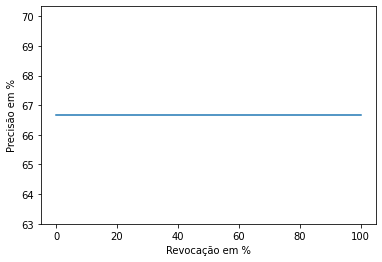

Modelo Vetorial
+----------------------------------+---------------------------------+
| Revocação - Precisão Interpolada | Precisão - Precisão Interpolada |
+----------------------------------+---------------------------------+
|               0.0                |               1.0               |
|               0.1                |               1.0               |
|               0.2                |               1.0               |
|               0.3                |               1.0               |
|               0.4                |               1.0               |
|               0.5                |               1.0               |
|               0.6                |               1.0               |
|               0.7                |               1.0               |
|               0.8                |               1.0               |
|               0.9                |               1.0               |
|               1.0                |               1.0       

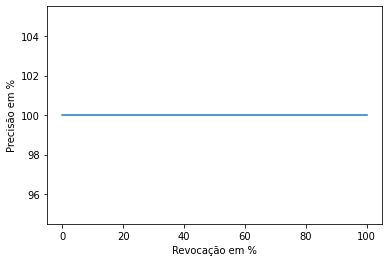

Precisão média para consulta - MAPi
+--------------------+------------------------+
|    MAPi - BM25     | MAPi - Modelo Vetorial |
+--------------------+------------------------+
| 0.5249999999999999 |          1.0           |
+--------------------+------------------------+


In [ ]:
resultadoEx2            = normalizacaoTokenizacao(M2, separadores2, stopwords2)
print("Resultado da normalização e tokenização:")
print(resultadoEx2)
print('\n')

consultaTratadaEx2      = tratamentoConsulta(q2, separadores2, stopwords2)
print("Resultado do tratamento da consulta:")
print(consultaTratadaEx2)
print('\n')

dicRank2 = similaridadeBM25(consultaTratadaEx2, resultadoEx2, len(resultadoEx2))

listRank2 = sorted(dicRank2.items(), key=lambda x: x[1], reverse=True)

ponderacaoDocumentosEx2 = ponderacaoTF_IDF(resultadoEx2)
print("Resultado da ponderação TF-IDF para os termos da coleção:")
print(ponderacaoDocumentosEx2)
print('\n')

var2                    = ponderacaoTF_IDF2(resultadoEx2, consultaTratadaEx2)
dicRank22                = rank(ponderacaoTF_IDF(resultadoEx2), var2)
listRank22               = sorted(dicRank22.items(), key=lambda x: x[1], reverse=True)

print("RANKING:")
print("\n\n")

tableRank2              = PrettyTable()

column_names2           = ["Posição", "No do Documento", "Documento", "Rank BM25"] 
#print(listRank1)

tableRank2.add_column(column_names2[0], [i+1 for i in range(len(listRank2))])
tableRank2.add_column(column_names2[1], [doc[0] for doc in listRank2])
tableRank2.add_column(column_names2[2], [M2[document[0]][0] for document in listRank2])
tableRank2.add_column(column_names2[3], [str(document[1]) for document in listRank2])


tableRank22              = PrettyTable()

column_names22           = ["Posição", "No do Documento", "Documento", "Rank Modelo Vetorial (TF-IDF)"] 
#print(listRank1)

tableRank22.add_column(column_names22[0], [i+1 for i in range(len(listRank22))])
tableRank22.add_column(column_names22[1], [doc[0] for doc in listRank22])
tableRank22.add_column(column_names22[2], [M2[document[0]][0] for document in listRank22])
tableRank22.add_column(column_names22[3], [str(document[1]) for document in listRank22])

print("BM25")
print(tableRank2)
print("Modelo Vetorial")
print(tableRank22)

# Parte do exercício 9 

revoc2 = getRevocacaoRanking([doc[0] for doc in listRank2], [i-1 for i in R2])
revoc22 = getRevocacaoRanking([doc2[0] for doc2 in listRank22], [i-1 for i in R2])

preci2 = getPrecisaoRanking([doc[0] for doc in listRank2], [i-1 for i in R2])
preci22 = getPrecisaoRanking([doc2[0] for doc2 in listRank22], [i-1 for i in R2])

print("AVALIAÇÃO DA RECUPERAÇÃO:")
print("\n\n")
print("Revocação e Precisão")
tableRank23              = PrettyTable()

column_names23           = ["Revocação - BM25", "Precisão - BM25"] 

tableRank23.add_column(column_names23[0], revoc2)
tableRank23.add_column(column_names23[1], preci2)

tableRank24              = PrettyTable()

column_names24           = ["Revocação - Modelo Vetorial", "Precisão - Modelo Vetorial"] 

tableRank24.add_column(column_names24[0], revoc22)
tableRank24.add_column(column_names24[1], preci22)

print(tableRank23)
print(tableRank24)

print("Precisão Interpolada")
print("BM25")
pI2 = precisaoInterpolada(refRecall, [revoc2,preci2])

tableRank25  = PrettyTable()

column_names25          = ["Revocação - Precisão Interpolada", "Precisão - Precisão Interpolada"] 

tableRank25.add_column(column_names25[0], [ element[0] for element in pI2 ])
tableRank25.add_column(column_names25[1], [ element[1] for element in pI2 ])

print(tableRank25)

plt.plot([ element*100 for element in refRecall ], [ item[1]*100  for item in pI2  ])
plt.xlabel('Revocação em %')
plt.ylabel('Precisão em %')
#plt.axis([0, 100, 0, 100])
plt.show()

print("Modelo Vetorial")
pI22 = precisaoInterpolada(refRecall, [revoc22,preci22])

tableRank26  = PrettyTable()

column_names26          = ["Revocação - Precisão Interpolada", "Precisão - Precisão Interpolada"] 

tableRank26.add_column(column_names26[0], [ element[0] for element in pI22 ])
tableRank26.add_column(column_names26[1], [ element[1] for element in pI22 ])

print(tableRank26)

plt.plot([ element*100 for element in refRecall ], [ item[1]*100  for item in pI22  ])
plt.xlabel('Revocação em %')
plt.ylabel('Precisão em %')
#plt.axis([0, 100, 0, 100])
plt.show()


print("Precisão média para consulta - MAPi")
#print("BM25")

mapi2 = MAPi(listRank2, [i-1 for i in R2])

#print("Modelo Vetorial")

mapi22 = MAPi(listRank22, [i-1 for i in R2])

tableRank27  = PrettyTable()

column_names27          = ["MAPi - BM25", "MAPi - Modelo Vetorial"] 

tableRank27.add_column(column_names27[0], [mapi2])
tableRank27.add_column(column_names27[1], [mapi22])

print(tableRank27)

# Exemplo 3

Coleção, stopwords, consulta e separadores

In [ ]:
# Conjunto de documentos
M3              = [["To do is to be. To be is to do."],
                  ["To be or not to be. I am what I am."],
                  ["I think therefore I am. Do be do be do."],
                  ["Do do do, da da da. Let it be, let it be."]]

# Lista de stopwords
stopwords3     = [] 


# String contendo os termos da consulta
q3             = "is it"

# Separadores para a tokenizacao
separadores3   = [" ",",",".","!","?",":","/","\\",";" ]      

R3 = [1,2]

Aplicação do pré-processamento na coleção e na consulta, aplicação do BM25 e o modelo vetorial na coleção, cálculo da revocação e precisão, precisão interpolada e precisão MAP

Resultado da normalização e tokenização:
[['to', 'do', 'is', 'to', 'be', 'to', 'be', 'is', 'to', 'do'], ['to', 'be', 'or', 'not', 'to', 'be', 'i', 'am', 'what', 'i', 'am'], ['i', 'think', 'therefore', 'i', 'am', 'do', 'be', 'do', 'be', 'do'], ['do', 'do', 'do', 'da', 'da', 'da', 'let', 'it', 'be', 'let', 'it', 'be']]


Resultado do tratamento da consulta:
['is', 'it']


Resultado da ponderação TF-IDF para os termos da coleção:
{0: {'to': 3.0, 'do': 0.8300749985576874, 'is': 4.0, 'be': 0.0, 'or': 0, 'not': 0, 'i': 0, 'am': 0, 'what': 0, 'think': 0, 'therefore': 0, 'da': 0, 'let': 0, 'it': 0}, 1: {'to': 2.0, 'do': 0, 'is': 0, 'be': 0.0, 'or': 2.0, 'not': 2.0, 'i': 2.0, 'am': 2.0, 'what': 2.0, 'think': 0, 'therefore': 0, 'da': 0, 'let': 0, 'it': 0}, 2: {'to': 0, 'do': 1.0728563720288948, 'is': 0, 'be': 0.0, 'or': 0, 'not': 0, 'i': 2.0, 'am': 1.0, 'what': 0, 'think': 2.0, 'therefore': 2.0, 'da': 0, 'let': 0, 'it': 0}, 3: {'to': 0, 'do': 1.0728563720288948, 'is': 0, 'be': 0.0, 'or': 0, 'not

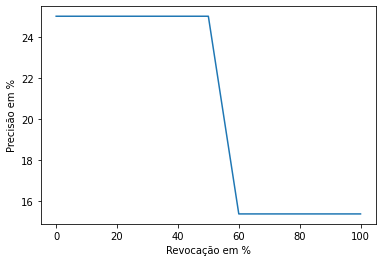

Modelo Vetorial
+----------------------------------+---------------------------------+
| Revocação - Precisão Interpolada | Precisão - Precisão Interpolada |
+----------------------------------+---------------------------------+
|               0.0                |               1.0               |
|               0.1                |               1.0               |
|               0.2                |               1.0               |
|               0.3                |               1.0               |
|               0.4                |               1.0               |
|               0.5                |               1.0               |
|               0.6                |        0.2222222222222222       |
|               0.7                |        0.2222222222222222       |
|               0.8                |        0.2222222222222222       |
|               0.9                |        0.2222222222222222       |
|               1.0                |        0.222222222222222

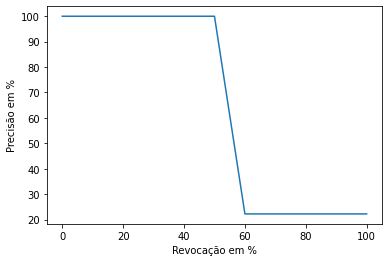

Precisão média para consulta - MAPi
+-------------+------------------------+
| MAPi - BM25 | MAPi - Modelo Vetorial |
+-------------+------------------------+
|     0.5     |          0.5           |
+-------------+------------------------+


In [ ]:
resultadoEx3            = normalizacaoTokenizacao(M3, separadores3, stopwords3)
print("Resultado da normalização e tokenização:")
print(resultadoEx3)
print('\n')

consultaTratadaEx3      = tratamentoConsulta(q3, separadores3, stopwords3)
print("Resultado do tratamento da consulta:")
print(consultaTratadaEx3)
print('\n')

dicRank3 = similaridadeBM25(consultaTratadaEx3, resultadoEx3, len(resultadoEx3))

listRank3 = sorted(dicRank3.items(), key=lambda x: x[1], reverse=True)

ponderacaoDocumentosEx3 = ponderacaoTF_IDF(resultadoEx3)
print("Resultado da ponderação TF-IDF para os termos da coleção:")
print(ponderacaoDocumentosEx3)
print('\n')

var3                    = ponderacaoTF_IDF2(resultadoEx3, consultaTratadaEx3)
dicRank32                = rank(ponderacaoTF_IDF(resultadoEx3), var3)
listRank32               = sorted(dicRank32.items(), key=lambda x: x[1], reverse=True)

print("RANKING:")
print("\n\n")

tableRank3              = PrettyTable()

column_names3           = ["Posição", "No do Documento", "Documento", "Rank BM25"] 
#print(listRank1)

tableRank3.add_column(column_names2[0], [i+1 for i in range(len(listRank3))])
tableRank3.add_column(column_names2[1], [doc[0] for doc in listRank3])
tableRank3.add_column(column_names3[2], [M3[document[0]][0] for document in listRank3])
tableRank3.add_column(column_names3[3], [str(document[1]) for document in listRank3])


tableRank32              = PrettyTable()

column_names32           = ["Posição", "No do Documento", "Documento", "Rank Modelo Vetorial (TF-IDF)"] 
#print(listRank1)

tableRank32.add_column(column_names32[0], [i+1 for i in range(len(listRank32))])
tableRank32.add_column(column_names32[1], [doc[0] for doc in listRank32])
tableRank32.add_column(column_names32[2], [M3[document[0]][0] for document in listRank32])
tableRank32.add_column(column_names32[3], [str(document[1]) for document in listRank32])

print("BM25")
print(tableRank3)
print("Modelo Vetorial")
print(tableRank32)

# Parte do exercício 9 
print("AVALIAÇÃO DA RECUPERAÇÃO:")
print("\n\n")
print("Revocação e Precisão")

revoc3 = getRevocacaoRanking([doc[0] for doc in listRank2], [i-1 for i in R3])
revoc32 = getRevocacaoRanking([doc2[0] for doc2 in listRank22], [i-1 for i in R3])

preci3 = getPrecisaoRanking([doc[0] for doc in listRank2], [i-1 for i in R3])
preci32 = getPrecisaoRanking([doc2[0] for doc2 in listRank22], [i-1 for i in R3])

tableRank33              = PrettyTable()

column_names33           = ["Revocação - BM25", "Precisão - BM25"] 

tableRank33.add_column(column_names33[0], revoc3)
tableRank33.add_column(column_names33[1], preci3)

tableRank34              = PrettyTable()

column_names34           = ["Revocação - Modelo Vetorial", "Precisão - Modelo Vetorial"] 

tableRank34.add_column(column_names34[0], revoc32)
tableRank34.add_column(column_names34[1], preci32)

print(tableRank33)
print(tableRank34)


print("Precisão Interpolada")
print("BM25")
pI3 = precisaoInterpolada(refRecall, [revoc3,preci3])

tableRank35  = PrettyTable()

column_names35          = ["Revocação - Precisão Interpolada", "Precisão - Precisão Interpolada"] 

tableRank35.add_column(column_names35[0], [ element[0] for element in pI3 ])
tableRank35.add_column(column_names35[1], [ element[1] for element in pI3 ])

print(tableRank35)

plt.plot([ element*100 for element in refRecall ], [ item[1]*100  for item in pI3  ])
plt.xlabel('Revocação em %')
plt.ylabel('Precisão em %')
#plt.axis([0, 100, 0, 100])
plt.show()

print("Modelo Vetorial")
pI32 = precisaoInterpolada(refRecall, [revoc32,preci32])

tableRank36  = PrettyTable()

column_names36          = ["Revocação - Precisão Interpolada", "Precisão - Precisão Interpolada"] 

tableRank36.add_column(column_names36[0], [ element[0] for element in pI32 ])
tableRank36.add_column(column_names36[1], [ element[1] for element in pI32 ])

print(tableRank36)

plt.plot([ element*100 for element in refRecall ], [ item[1]*100  for item in pI32  ])
plt.xlabel('Revocação em %')
plt.ylabel('Precisão em %')
#plt.axis([0, 100, 0, 100])
plt.show()

print("Precisão média para consulta - MAPi")
#print("BM25")

mapi3 = MAPi(listRank3, [i-1 for i in R3])

#print("Modelo Vetorial")

mapi32 = MAPi(listRank32, [i-1 for i in R3])

tableRank37  = PrettyTable()

column_names37          = ["MAPi - BM25", "MAPi - Modelo Vetorial"] 

tableRank37.add_column(column_names37[0], [mapi3])
tableRank37.add_column(column_names37[1], [mapi32])

print(tableRank37)